# Data Processing

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq


In [45]:
path_to_down = "C:\\Users\\ryanz\\Documents\\CS528\\gyroscope\\IMU\\data\\sensor_data_down.csv"
path_to_up = "C:\\Users\\ryanz\\Documents\\CS528\\gyroscope\\IMU\\data\\sensor_data_up.csv"
path_to_left = "C:\\Users\\ryanz\\Documents\\CS528\\gyroscope\\IMU\\data\\sensor_data_left.csv"
path_to_right = "C:\\Users\\ryanz\\Documents\\CS528\\gyroscope\\IMU\\data\\sensor_data_right.csv"

down = pd.read_csv(path_to_down)
up = pd.read_csv(path_to_up)
left = pd.read_csv(path_to_left)
right = pd.read_csv(path_to_right)


In [46]:
def reformat(df, column_name):
    first_value = df[column_name].iloc[0]
    df[column_name] = df[column_name] - first_value
    
    return df


In [47]:
down = down.drop(index=0)
up = up.drop(index=0)
left = left.drop(index=0)
right = right.drop(index=0)

down = down.drop(labels=['Sample Num'], axis=1)
up = up.drop(labels=['Sample Num'], axis=1)
left = left.drop(labels=['Sample Num'], axis=1)
right = right.drop(labels=['Sample Num'], axis=1)

down = down.rename(columns={'Unnamed: 0': 'Sample Num'})
up = up.rename(columns={'Unnamed: 0': 'Sample Num'})
left = left.rename(columns={'Unnamed: 0': 'Sample Num'})
right = right.rename(columns={'Unnamed: 0': 'Sample Num'})




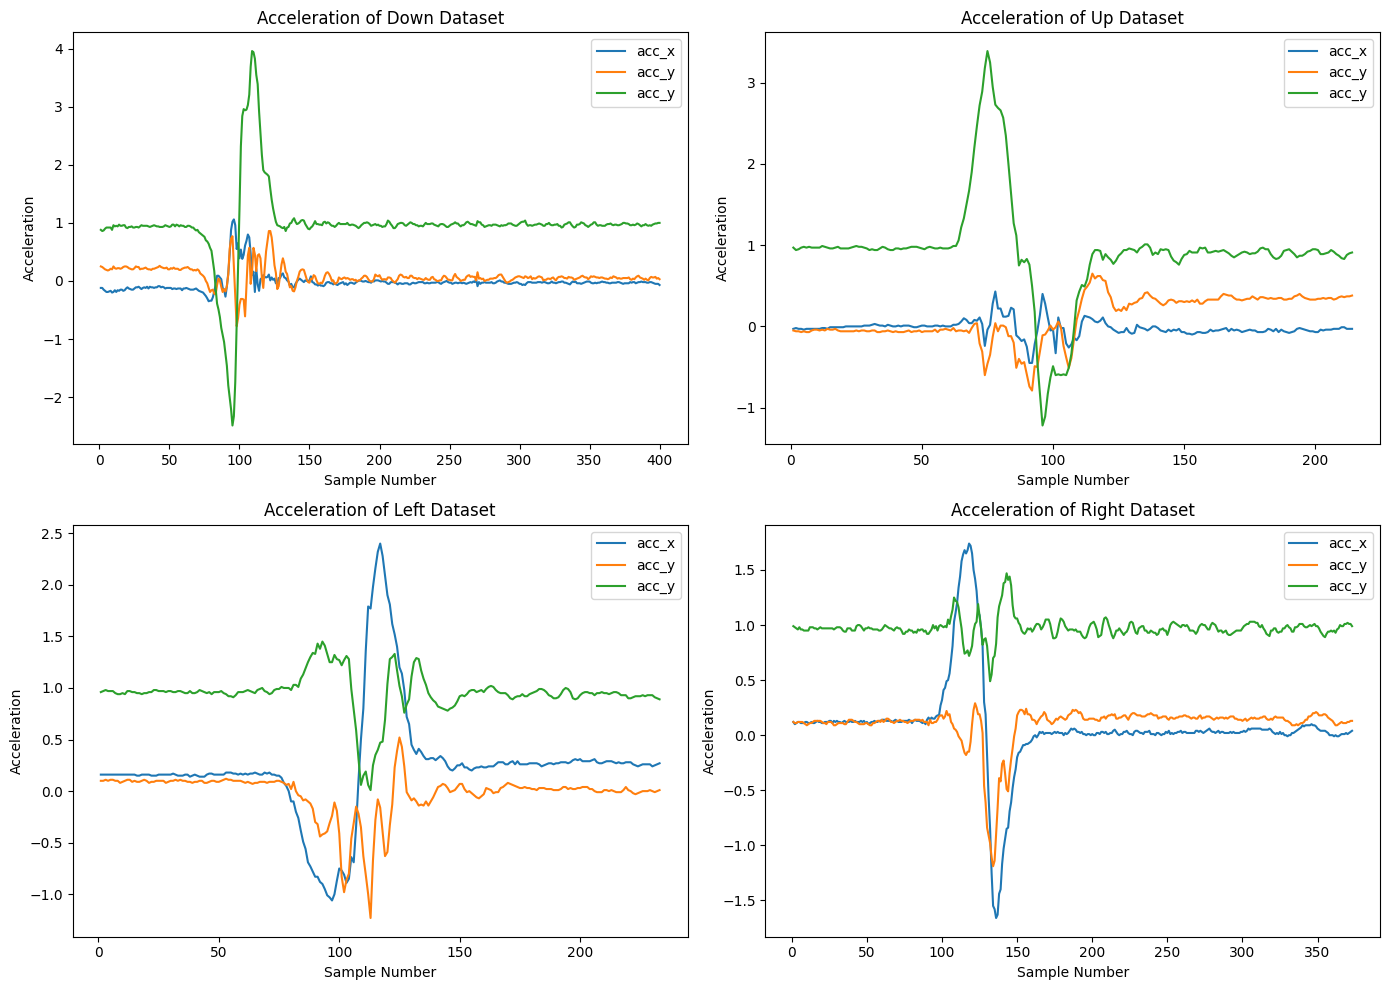

In [48]:

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.lineplot(ax=axs[0, 0], x=down['Sample Num'], y=down['acc_x'], label='acc_x')
sns.lineplot(ax=axs[0, 0], x=down['Sample Num'], y=down['acc_y'], label='acc_y')
sns.lineplot(ax=axs[0, 0], x=down['Sample Num'], y=down['acc_z'], label='acc_y')
axs[0, 0].set_title('Acceleration of Down Dataset')

sns.lineplot(ax=axs[0, 1], x=up['Sample Num'], y=up['acc_x'], label='acc_x')
sns.lineplot(ax=axs[0, 1], x=up['Sample Num'], y=up['acc_y'], label='acc_y')
sns.lineplot(ax=axs[0, 1], x=up['Sample Num'], y=up['acc_z'], label='acc_y')
axs[0, 1].set_title('Acceleration of Up Dataset')

sns.lineplot(ax=axs[1, 0], x=left['Sample Num'], y=left['acc_x'], label='acc_x')
sns.lineplot(ax=axs[1, 0], x=left['Sample Num'], y=left['acc_y'], label='acc_y')
sns.lineplot(ax=axs[1, 0], x=left['Sample Num'], y=left['acc_z'], label='acc_y')
axs[1, 0].set_title('Acceleration of Left Dataset')

sns.lineplot(ax=axs[1, 1], x=right['Sample Num'], y=right['acc_x'], label='acc_x')
sns.lineplot(ax=axs[1, 1], x=right['Sample Num'], y=right['acc_y'], label='acc_y')
sns.lineplot(ax=axs[1, 1], x=right['Sample Num'], y=right['acc_z'], label='acc_y')
axs[1, 1].set_title('Acceleration of Right Dataset')

for ax in axs.flat:
    ax.set(xlabel='Sample Number', ylabel='Acceleration')

plt.tight_layout()
plt.legend()
plt.savefig("C:\\Users\\ryanz\\Documents\\CS528\\gyroscope\\IMU\\figures\\acceleration.png")
plt.show()


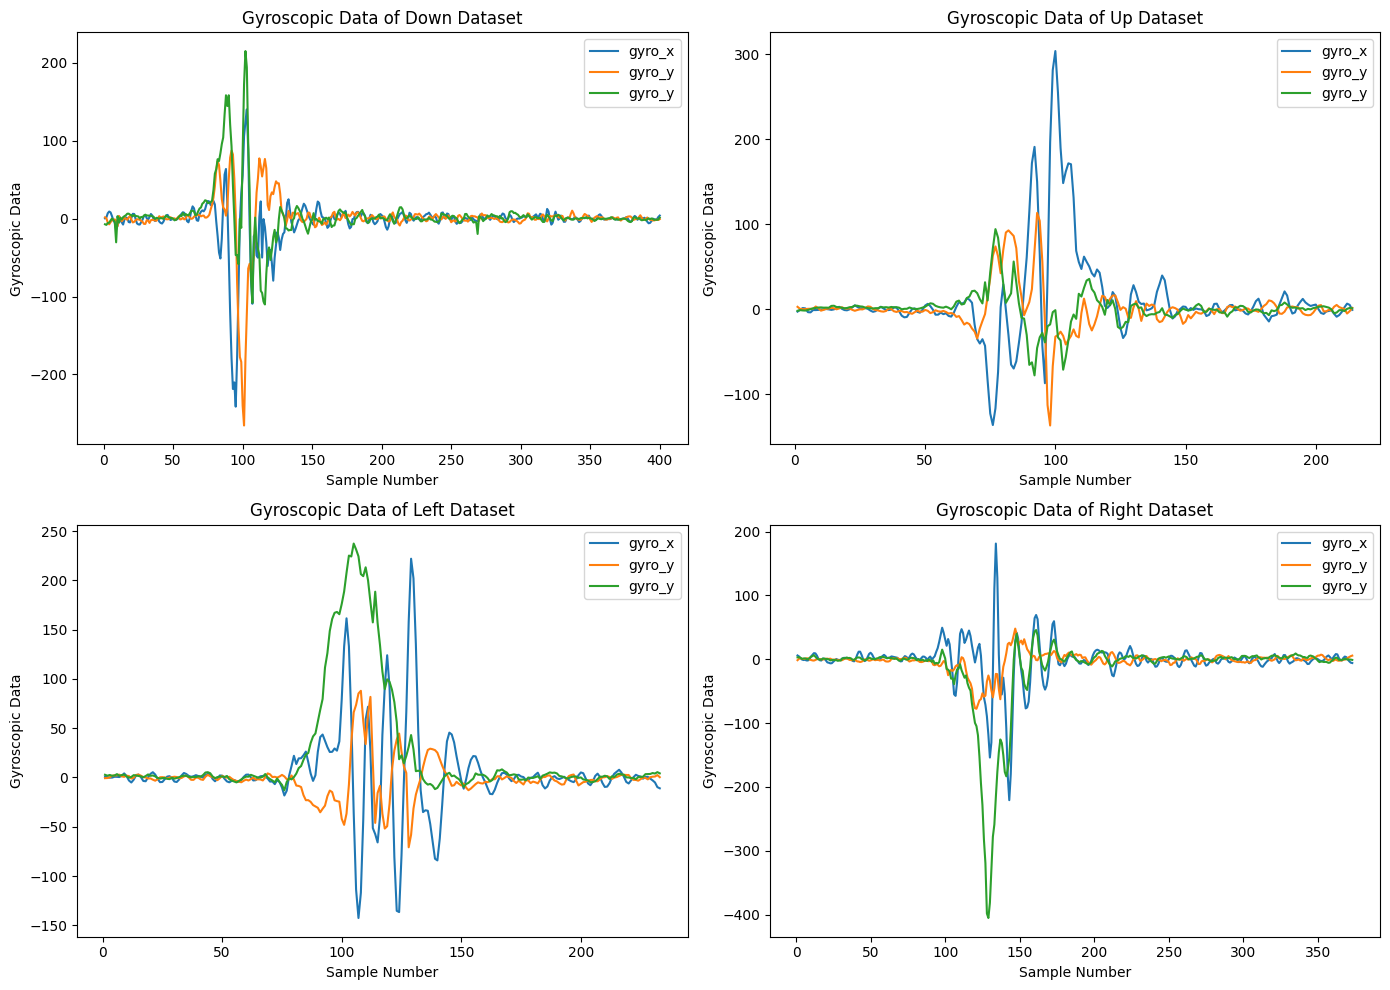

In [49]:

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.lineplot(ax=axs[0, 0], x=down['Sample Num'], y=down['gyro_x'], label='gyro_x')
sns.lineplot(ax=axs[0, 0], x=down['Sample Num'], y=down['gyro_y'], label='gyro_y')
sns.lineplot(ax=axs[0, 0], x=down['Sample Num'], y=down['gyro_z'], label='gyro_y')
axs[0, 0].set_title('Gyroscopic Data of Down Dataset')

sns.lineplot(ax=axs[0, 1], x=up['Sample Num'], y=up['gyro_x'], label='gyro_x')
sns.lineplot(ax=axs[0, 1], x=up['Sample Num'], y=up['gyro_y'], label='gyro_y')
sns.lineplot(ax=axs[0, 1], x=up['Sample Num'], y=up['gyro_z'], label='gyro_y')
axs[0, 1].set_title('Gyroscopic Data of Up Dataset')

sns.lineplot(ax=axs[1, 0], x=left['Sample Num'], y=left['gyro_x'], label='gyro_x')
sns.lineplot(ax=axs[1, 0], x=left['Sample Num'], y=left['gyro_y'], label='gyro_y')
sns.lineplot(ax=axs[1, 0], x=left['Sample Num'], y=left['gyro_z'], label='gyro_y')
axs[1, 0].set_title('Gyroscopic Data of Left Dataset')

sns.lineplot(ax=axs[1, 1], x=right['Sample Num'], y=right['gyro_x'], label='gyro_x')
sns.lineplot(ax=axs[1, 1], x=right['Sample Num'], y=right['gyro_y'], label='gyro_y')
sns.lineplot(ax=axs[1, 1], x=right['Sample Num'], y=right['gyro_z'], label='gyro_y')
axs[1, 1].set_title('Gyroscopic Data of Right Dataset')

for ax in axs.flat:
    ax.set(xlabel='Sample Number', ylabel='Gyroscopic Data')

plt.tight_layout()
plt.legend()
plt.savefig("C:\\Users\\ryanz\\Documents\\CS528\\gyroscope\\IMU\\figures\\gyroscope.png")
plt.show()



In [50]:
def calculate_fft(data):
    data = np.array(data)
    data = data - np.mean(data)
    sampling_rate = 100
    T = 1 / sampling_rate 
    fft_result = fft(data)
    frequencies = fftfreq(len(data), T)
    
    return frequencies[:len(frequencies)//2], abs(fft_result[:len(fft_result)//2])





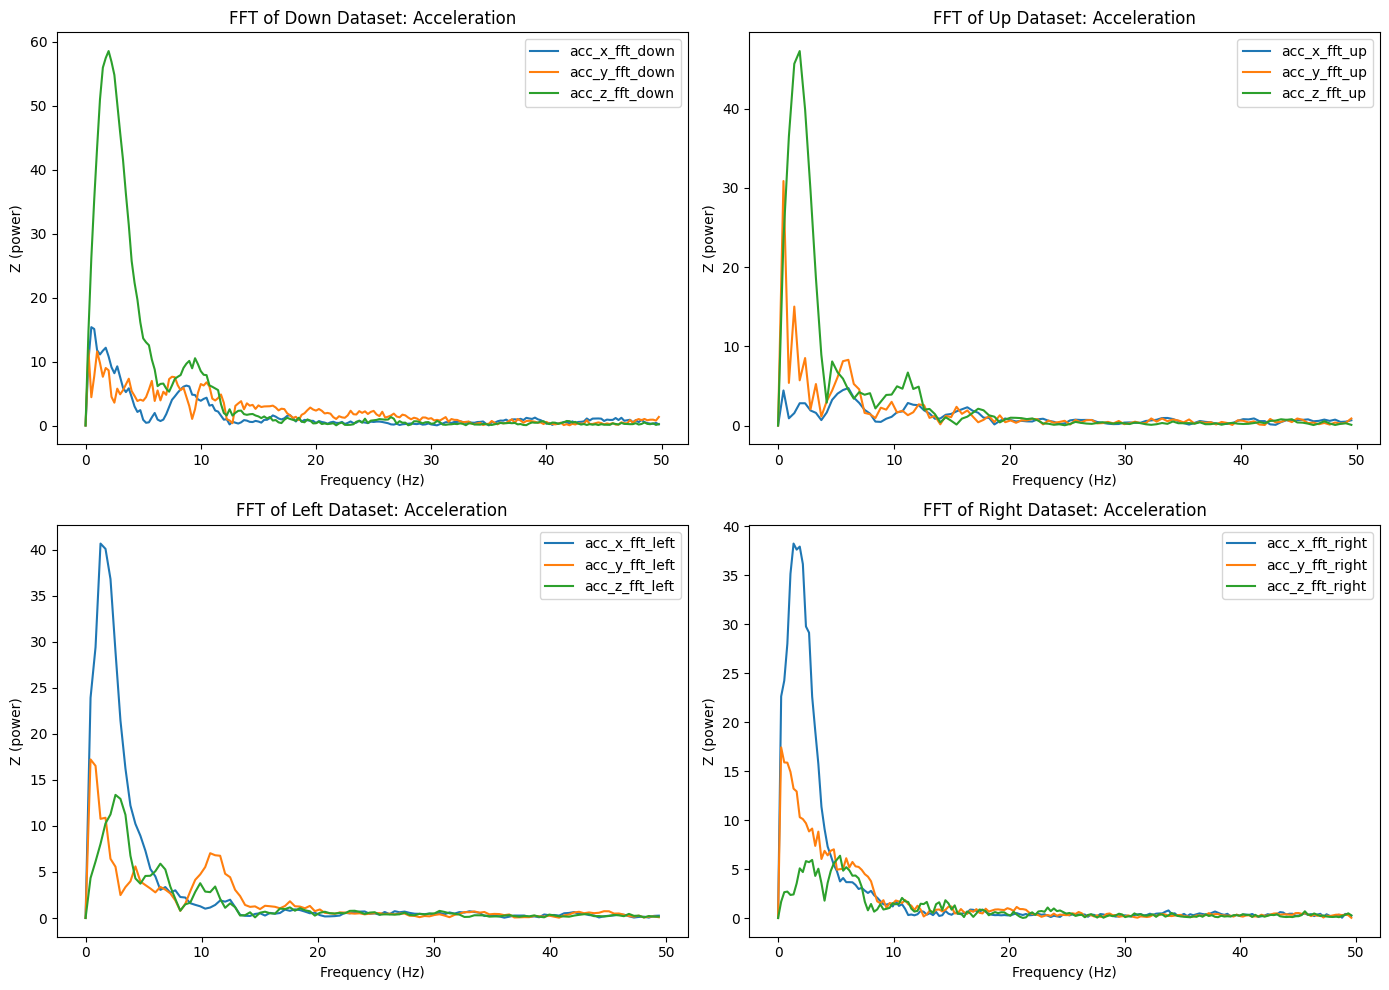

In [51]:
acc_x_fft_down = calculate_fft(down['acc_x'])
acc_y_fft_down = calculate_fft(down['acc_y'])
acc_z_fft_down = calculate_fft(down['acc_z'])

acc_x_fft_up = calculate_fft(up['acc_x'])
acc_y_fft_up = calculate_fft(up['acc_y'])
acc_z_fft_up = calculate_fft(up['acc_z'])

acc_x_fft_left = calculate_fft(left['acc_x'])
acc_y_fft_left = calculate_fft(left['acc_y'])
acc_z_fft_left = calculate_fft(left['acc_z'])

acc_x_fft_right = calculate_fft(right['acc_x'])
acc_y_fft_right = calculate_fft(right['acc_y'])
acc_z_fft_right = calculate_fft(right['acc_z'])

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.lineplot(ax=axs[0, 0], x=acc_x_fft_down[0], y=acc_x_fft_down[1], label='acc_x_fft_down')
sns.lineplot(ax=axs[0, 0], x=acc_y_fft_down[0], y=acc_y_fft_down[1], label='acc_y_fft_down')
sns.lineplot(ax=axs[0, 0], x=acc_z_fft_down[0], y=acc_z_fft_down[1], label='acc_z_fft_down')
axs[0, 0].set_title('FFT of Down Dataset: Acceleration')

sns.lineplot(ax=axs[0, 1], x=acc_x_fft_up[0], y=acc_x_fft_up[1], label='acc_x_fft_up')
sns.lineplot(ax=axs[0, 1], x=acc_y_fft_up[0], y=acc_y_fft_up[1], label='acc_y_fft_up')
sns.lineplot(ax=axs[0, 1], x=acc_z_fft_up[0], y=acc_z_fft_up[1], label='acc_z_fft_up')
axs[0, 1].set_title('FFT of Up Dataset: Acceleration')

sns.lineplot(ax=axs[1, 0], x=acc_x_fft_left[0], y=acc_x_fft_left[1], label='acc_x_fft_left')
sns.lineplot(ax=axs[1, 0], x=acc_y_fft_left[0], y=acc_y_fft_left[1], label='acc_y_fft_left')
sns.lineplot(ax=axs[1, 0], x=acc_z_fft_left[0], y=acc_z_fft_left[1], label='acc_z_fft_left')
axs[1, 0].set_title('FFT of Left Dataset: Acceleration')

sns.lineplot(ax=axs[1, 1], x=acc_x_fft_right[0], y=acc_x_fft_right[1], label='acc_x_fft_right')
sns.lineplot(ax=axs[1, 1], x=acc_y_fft_right[0], y=acc_y_fft_right[1], label='acc_y_fft_right')
sns.lineplot(ax=axs[1, 1], x=acc_z_fft_right[0], y=acc_z_fft_right[1], label='acc_z_fft_right')
axs[1, 1].set_title('FFT of Right Dataset: Acceleration')

for ax in axs.flat:
    ax.set(xlabel='Frequency (Hz)', ylabel='Z (power)')

plt.tight_layout()
plt.legend()
plt.savefig("C:\\Users\\ryanz\\Documents\\CS528\\gyroscope\\IMU\\figures\\acceleration_fft.png")
plt.show()



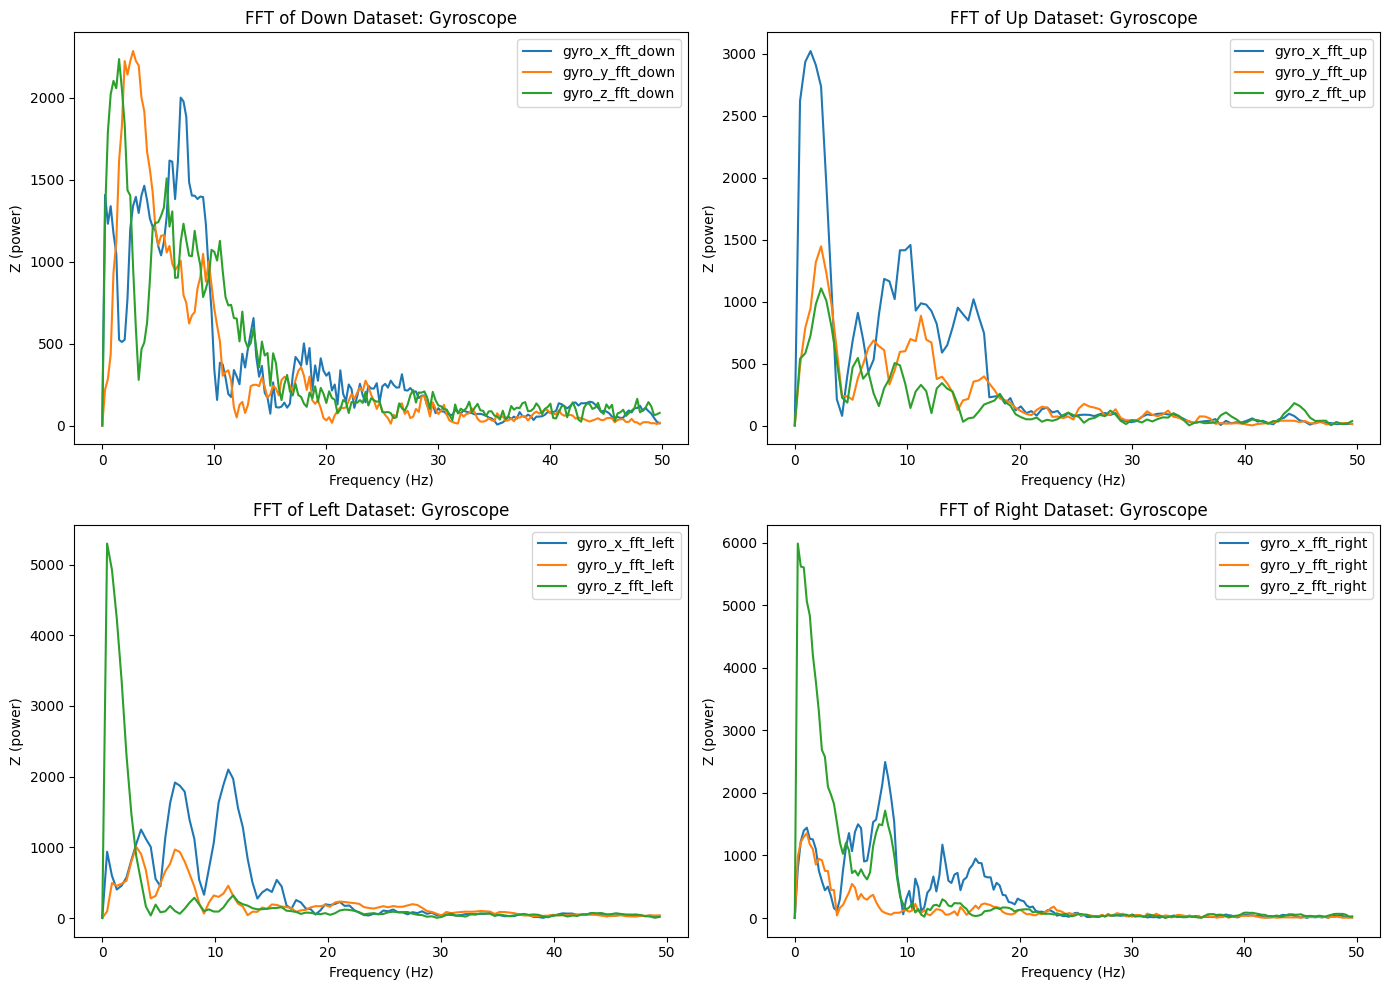

In [52]:
gyro_x_fft_down = calculate_fft(down['gyro_x'])
gyro_y_fft_down = calculate_fft(down['gyro_y'])
gyro_z_fft_down = calculate_fft(down['gyro_z'])

gyro_x_fft_up = calculate_fft(up['gyro_x'])
gyro_y_fft_up = calculate_fft(up['gyro_y'])
gyro_z_fft_up = calculate_fft(up['gyro_z'])

gyro_x_fft_left = calculate_fft(left['gyro_x'])
gyro_y_fft_left = calculate_fft(left['gyro_y'])
gyro_z_fft_left = calculate_fft(left['gyro_z'])

gyro_x_fft_right = calculate_fft(right['gyro_x'])
gyro_y_fft_right = calculate_fft(right['gyro_y'])
gyro_z_fft_right = calculate_fft(right['gyro_z'])

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.lineplot(ax=axs[0, 0], x=gyro_x_fft_down[0], y=gyro_x_fft_down[1], label='gyro_x_fft_down')
sns.lineplot(ax=axs[0, 0], x=gyro_y_fft_down[0], y=gyro_y_fft_down[1], label='gyro_y_fft_down')
sns.lineplot(ax=axs[0, 0], x=gyro_z_fft_down[0], y=gyro_z_fft_down[1], label='gyro_z_fft_down')
axs[0, 0].set_title('FFT of Down Dataset: Gyroscope')

sns.lineplot(ax=axs[0, 1], x=gyro_x_fft_up[0], y=gyro_x_fft_up[1], label='gyro_x_fft_up')
sns.lineplot(ax=axs[0, 1], x=gyro_y_fft_up[0], y=gyro_y_fft_up[1], label='gyro_y_fft_up')
sns.lineplot(ax=axs[0, 1], x=gyro_z_fft_up[0], y=gyro_z_fft_up[1], label='gyro_z_fft_up')
axs[0, 1].set_title('FFT of Up Dataset: Gyroscope')

sns.lineplot(ax=axs[1, 0], x=gyro_x_fft_left[0], y=gyro_x_fft_left[1], label='gyro_x_fft_left')
sns.lineplot(ax=axs[1, 0], x=gyro_y_fft_left[0], y=gyro_y_fft_left[1], label='gyro_y_fft_left')
sns.lineplot(ax=axs[1, 0], x=gyro_z_fft_left[0], y=gyro_z_fft_left[1], label='gyro_z_fft_left')
axs[1, 0].set_title('FFT of Left Dataset: Gyroscope')

sns.lineplot(ax=axs[1, 1], x=gyro_x_fft_right[0], y=gyro_x_fft_right[1], label='gyro_x_fft_right')
sns.lineplot(ax=axs[1, 1], x=gyro_y_fft_right[0], y=gyro_y_fft_right[1], label='gyro_y_fft_right')
sns.lineplot(ax=axs[1, 1], x=gyro_z_fft_right[0], y=gyro_z_fft_right[1], label='gyro_z_fft_right')
axs[1, 1].set_title('FFT of Right Dataset: Gyroscope')

for ax in axs.flat:
    ax.set(xlabel='Frequency (Hz)', ylabel='Z (power)')

plt.tight_layout()
plt.legend()
plt.savefig("C:\\Users\\ryanz\\Documents\\CS528\\gyroscope\\IMU\\figures\\gyroscope_fft.png")
plt.show()

